# Wczytujemy dane z pliku

Zbiór to prawdziwe ceny mieszkań w Poznaniu zescrappowane z portalu gratka 


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
%matplotlib inline  

In [2]:
r = pd.read_csv('ceny_mieszkan_w_poznaniu.tsv', sep = '\t')

# Oglądamy wstępnie dane

In [3]:
len(r)

1674

In [4]:
r.tail()

,price,isNew,rooms,floor,location,sqrMeters
1669,299000.0,True,2,0,Grunwald,51
1670,339000.0,True,2,2,Centrum,53
1671,320000.0,True,3,4,Stare,65
1672,364000.0,True,3,1,Nowe,67
1673,209000.0,True,3,3,Grunwald,50


In [5]:
r.shape

(1674, 6)

In [6]:
r.describe()

,price,rooms,floor,sqrMeters
count,1.674000e+03,1674.000000,1674.000000,1674.000000
mean,3.672813e+05,2.684588,2.989247,57.877539
std,1.639803e+05,0.775238,2.950053,23.091438
min,1.000000e+05,2.000000,0.000000,12.000000
25%,2.800625e+05,2.000000,1.000000,44.000000
50%,3.301275e+05,3.000000,2.000000,54.000000
75%,3.990000e+05,3.000000,4.000000,71.000000
max,2.700000e+06,7.000000,16.000000,196.000000


In [7]:
r['location']

0          Centrum
1           Sołacz
2           Sołacz
3           Sołacz
4           Sołacz
5       Naramowice
6            Wilda
7         Grunwald
8         Grunwald
9         Grunwald
10            Nowe
11           Wilda
12        Grunwald
13           Wilda
14       Starołęka
15       Winogrady
16          Rataje
17       Winogrady
18          Zawady
19          Rataje
20           Malta
21          Rataje
22          Rataje
23          Rataje
24            Nowe
25           Wilda
26      Komandoria
27        Podolany
28          Dębiec
29          Rataje
           ...    
1644          Nowe
1645     Winogrady
1646         Stare
1647         Wilda
1648        Sołacz
1649        Jeżyce
1650      Grunwald
1651     Starołęka
1652     Starołęka
1653     Starołęka
1654     Starołęka
1655         Stare
1656      Podolany
1657          Nowe
1658     Winogrady
1659      Podolany
1660         Wilda
1661       Górczyn
1662        Dębiec
1663         Stare
1664          Nowe
1665        

In [8]:
r.location.value_counts()

Grunwald        303
Winogrady       217
Rataje          164
Jeżyce          138
Stare           128
Centrum         116
Nowe             92
Piątkowo         76
Wilda            75
Naramowice       69
Starołęka        45
Podolany         41
Łazarz           34
Dębiec           32
Górczyn          31
Sołacz           21
Głuszyna         13
Szczepankowo     12
Ogrody            8
Malta             7
Winiary           5
Śródka            5
Zawady            5
Chwaliszewo       4
Antoninek         3
Garbary           3
Świerczewo        3
Bonin             3
Plewiska          3
Strzeszyn         2
Dolna             2
Żegrze            2
Kobylepole        1
Suchy             1
Morasko           1
Komandoria        1
Smochowice        1
Nadolnik          1
Piatkowo          1
Wilczak           1
Ławica            1
Kopernika         1
Dąbrowskiego      1
Komorniki         1
Name: location, dtype: int64

In [9]:
r.dtypes

price        float64
isNew           bool
rooms          int64
floor          int64
location      object
sqrMeters      int64
dtype: object

## Dane (typy danych/zmienne w statystyce) na przykładach
### Cena, ilośc m. kw. = zmienna ilościowa ciągła 

Przestrzeń liczb rzeczywistych (albo podzbiór ciągły)

tak samo np. zarobki, długośc w metrach, waga

Zawsze jesteśmy w stanie mieć większą dokładność pomiarów. Miedzy wzrostem 1.80m, a 1.81m jest nieprzeliczalna ilośc wartości.


### Ilość pokoi, piętro = zmienna ilościowa dyskretna

Zbiór wartości to uporządkowany zbiór dyskretny.

możemy powiedzieć że coś jest o ileś/ileś razy większe od czegoś (np 5 członków rodziny to więcej niż 3 członków rodziny, 4 pokoje to dwa razy więcej niż 2 pokoje)

np. ocena w skali 1-10 (co 1), liczba dzieci


### zmienna ilościowa porządkowa ( w tym zbiorze nie ma)

np. wykształcenie, oceny studentów

Pewien skończony zbiór lub uporządkowany zbiór dyskretny

Można uporządkować, bo lepiej mieć wykszłcenie wyższe niż średnie albo ocene 5 niż 2

Nie możemy natomiast powiedzieć że wykształcenie wyższe jest ileś razy lepsze niż średnie albo ocena 5 jest lepsza ileś razy niż ocena 2.

### lokacja = zmienna jakościowa (kategoryczna)

Zbioru wartości nie da się sensownie uporządkować (bo nie można powiedzieć że Stare Miasto jest przed Sołaczem albo że chrześcijaństwo jest lepsze niż islam)

In [10]:
r.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1674.0,367281.254283,163980.312648,100000.0,280062.5,330127.5,399000.0,2700000.0
rooms,1674.0,2.684588,0.775238,2.0,2.0,3.0,3.0,7.0
floor,1674.0,2.989247,2.950053,0.0,1.0,2.0,4.0,16.0
sqrMeters,1674.0,57.877539,23.091438,12.0,44.0,54.0,71.0,196.0


In [11]:
r.head()

,price,isNew,rooms,floor,location,sqrMeters
0,476118.0,False,3,1,Centrum,78
1,459531.0,False,3,2,Sołacz,62
2,411557.0,False,3,0,Sołacz,15
3,496416.0,False,4,0,Sołacz,14
4,406032.0,False,3,0,Sołacz,15


In [12]:
r['price'].head()

0    476118.0
1    459531.0
2    411557.0
3    496416.0
4    406032.0
Name: price, dtype: float64

# To teraz spróbujmy je narysować

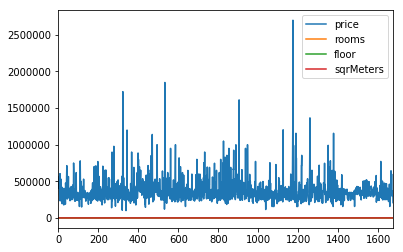

In [13]:
r.plot()

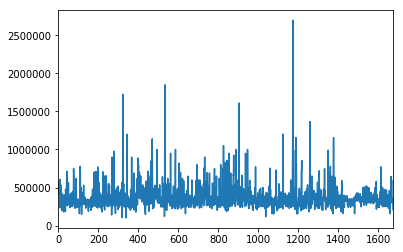

In [14]:
r['price'].plot()

## Te dane są w porządku losowym (więc powyższe wykresy są nieczytelne). Posortujmy je

In [15]:
r_sorted_by_price = r.sort_values(by=['price'])

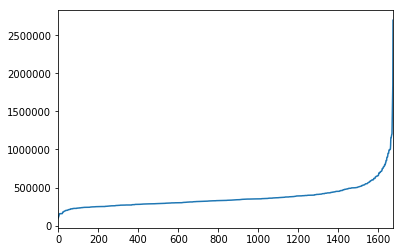

In [16]:
r_sorted_by_price['price'].plot(use_index=False)

## Nadal średnio to wygląda, bo danych jest zbyt dużo do ogarnięcia na raz, spróbujmy inaczej, po każdej cesze z osobna:

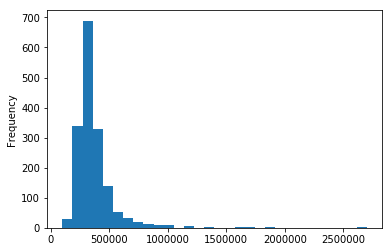

In [17]:
r.price.plot(kind = 'hist', bins=30)

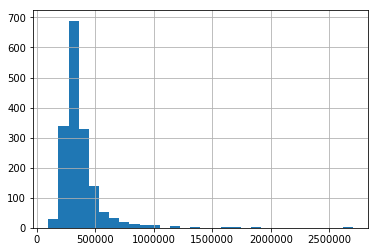

In [18]:
r.price.hist(bins=30) # histogram dla danych ciągłych (cena)
# oj, widać że jest parę mieszkań (mało) bardzo drogich

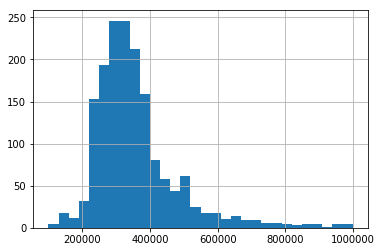

In [19]:
r[r.price < 1000000].price.hist(bins=30) # histogram dla mieszkań wartych mniej niż milion


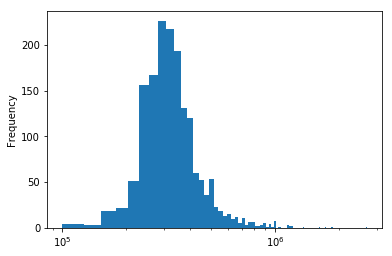

In [20]:
r.price.plot(kind = 'hist', bins=100, logx = True)

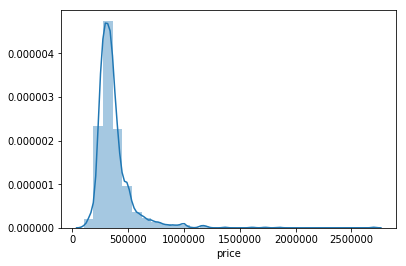

In [21]:
sns.distplot(r.price, bins = 30)

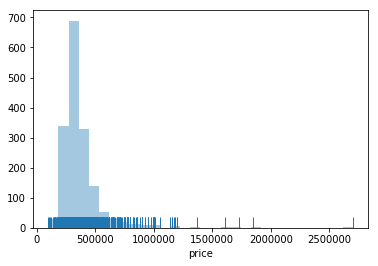

In [22]:
# inny sposób rysowania histogramu z zaznaczeniem każdej obserwacji:
sns.distplot(r.price, bins=30, kde=False, rug=True)

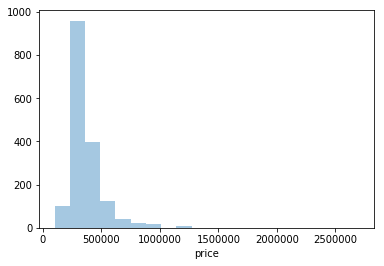

In [23]:
# przy rysowaniu histogramu ważne jest jaką przyjmiemy ilość binów. Nie dowiemy się wiele jeśli wybierzemy bardzo mało albo bardzo dużo binów:
sns.distplot(r.price, bins=20, kde=False)

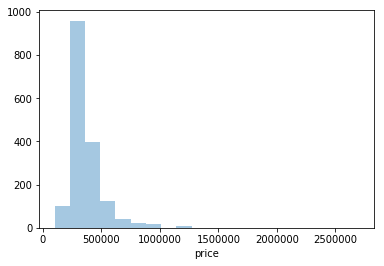

In [24]:
sns.distplot(r['price'], bins=20, kde=False)

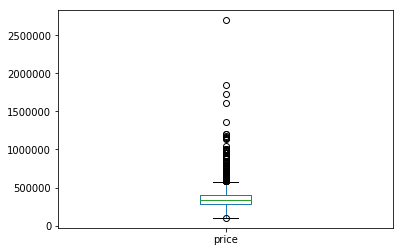

In [25]:
r.price.plot.box() # boxplot, jak widać mamy sporo odstających obserwacji!

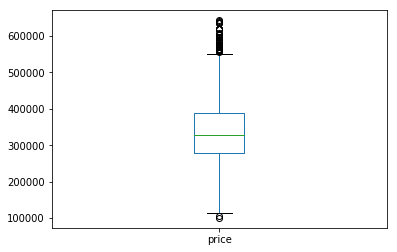

In [26]:
# Załóżmy, że chcemy się pozbyć obserwacji z cenami powyżej 99 percentyla:
r_price_cleared = r[r.price < r.price.quantile(0.95)]
r_price_cleared.price.plot.box() # tu już nie ma takiej rozbieżności

**Ćwiczenie**

Narysuj histogram cen mieszkań na podstawie df'a r_price_cleared

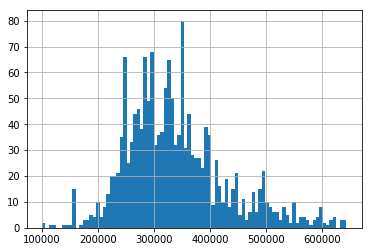

In [27]:
r_price_cleared.price.hist(bins = 90)

In [28]:
r.rooms.value_counts()

2    811
3    614
4    219
5     27
6      2
7      1
Name: rooms, dtype: int64

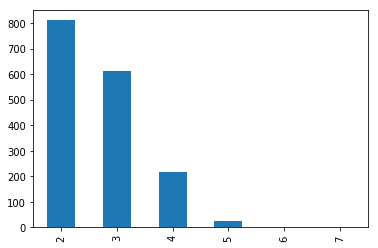

In [29]:
r.rooms.value_counts().plot.bar() # barplot dla danych dyskretnych (ilość pokoi)

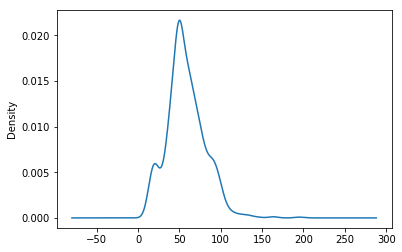

In [30]:
r.sqrMeters.plot.density()

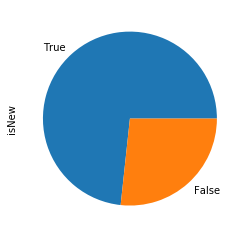

In [31]:
r.isNew.value_counts().plot.pie()

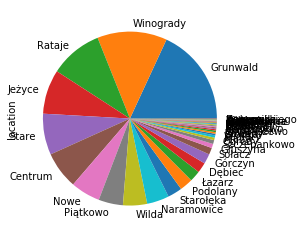

In [32]:
r.location.value_counts().plot.pie()

https://www.businessinsider.com/pie-charts-are-the-worst-2013-6?IR=T

https://www.quora.com/Do-pie-charts-deserve-their-current-reputation-as-bad-visualizations

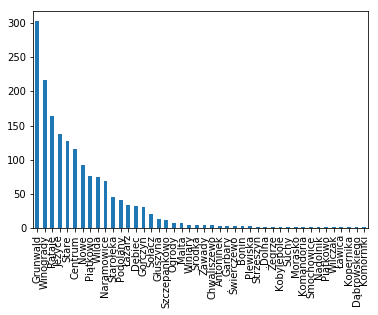

In [33]:
r.location.value_counts().plot.bar()

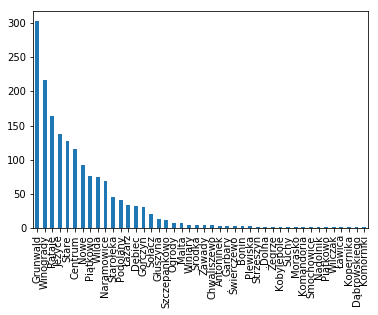

In [34]:
r.location.value_counts().plot.bar()

# Spróbujemy znaleźć jakies zależnosci i je zwizualizować 
(wizualizacja dzięki bibliotece seaborn)

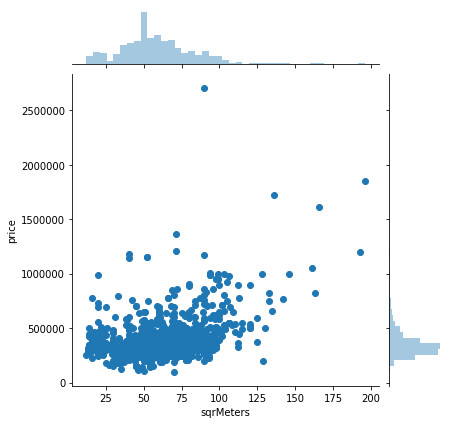

In [35]:
sns.jointplot(x = r["sqrMeters"], y = r["price"])

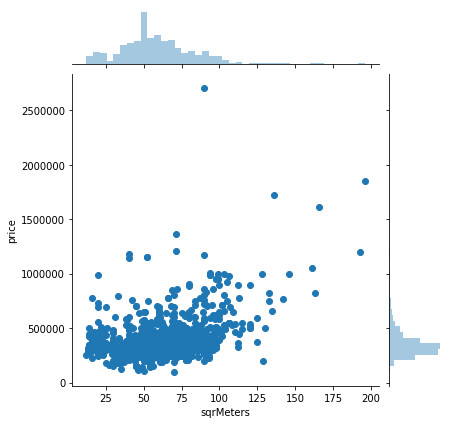

In [36]:
sns.jointplot(x = "sqrMeters", y = "price", data = r)

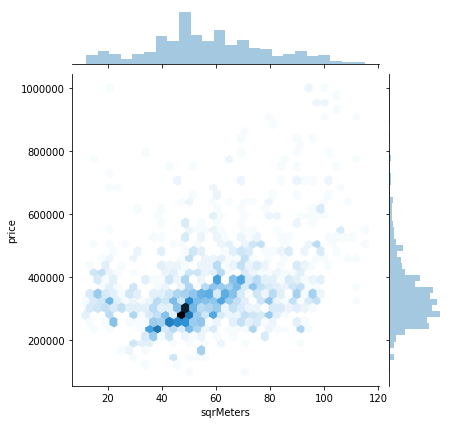

In [37]:
r_price_cleared = r[r.price < r.price.quantile(0.99)]
r_m2_cleared = r_price_cleared[r_price_cleared.sqrMeters < r.sqrMeters.quantile(0.99)]
sns.jointplot("sqrMeters", "price", kind = "hex", data = r_m2_cleared) # tak jest czytelniej

Narzędziem używanym do analizy cech i ich zależności jest korelacja. Użyjemy tutaj korelacji liniowej.

Korelacja przyjmuje wartości od -1 do 1.
Wartość:
 * -1 oznacza że cechy są ze sobą w pełni negatywnie skorelowane tj. wraz ze wzrostem jednem - druga maleje proporcjonalnie
 * 0 oznacza że cechy nie są ze sobą w ogóle skorelowane tj. nie jesteśmy w stanie wyjaśnić zmieny jednej cechy poprzez wartość drugiej cechy
 * 1 oznacza że cechy są ze sobą w pełni pozytywnie skorelowane tj. wraz ze wzrostem jednem - druga wzrasta proporcjonalnie


https://pl.wikipedia.org/wiki/Wsp%C3%B3%C5%82czynnik_korelacji_Pearsona

In [38]:
r.corr() # sprawdźmy korelację liniową cech
# widać że np ilość metrów jest skorelowana dodatnio z ceną
# potwierdza to, co widzimy na wykresach

,price,isNew,rooms,floor,sqrMeters
price,1.000000,0.034873,0.508833,-0.068882,0.422073
isNew,0.034873,1.000000,0.008730,-0.062179,0.083835
rooms,0.508833,0.008730,1.000000,-0.078585,0.377587
floor,-0.068882,-0.062179,-0.078585,1.000000,-0.055053
sqrMeters,0.422073,0.083835,0.377587,-0.055053,1.000000


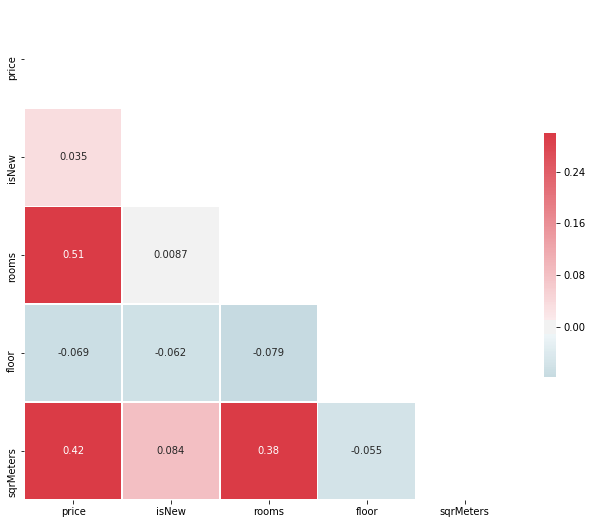

In [39]:
# do oglądania korelacji najlepiej użyć wizualizacji w postaci heatmapy:
corr = r.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

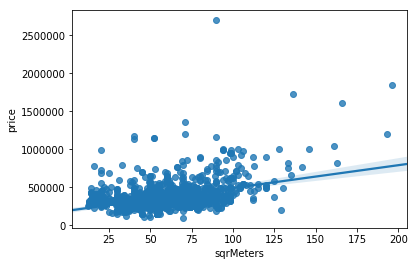

In [40]:
sns.regplot(r.sqrMeters, r.price) # rzeczywiście - im więcej metrów kw. tym większa cena

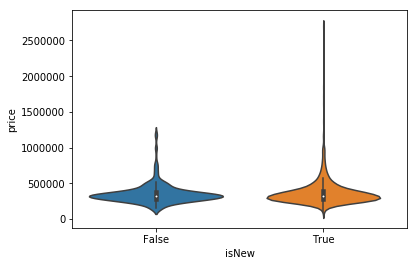

In [41]:
sns.violinplot(x = "isNew", y = "price", data = r) # 

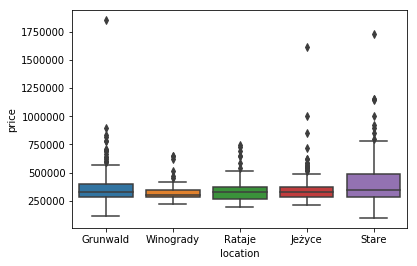

In [42]:
# ceny w zależności od lokacji (dla 5 najbardziej popularnych)
popular_locations = r.location.value_counts().head(5)
r_popular_locations = r[r.location.isin(popular_locations.keys())]
sns.boxplot(x = "location", y = "price", data = r_popular_locations) 

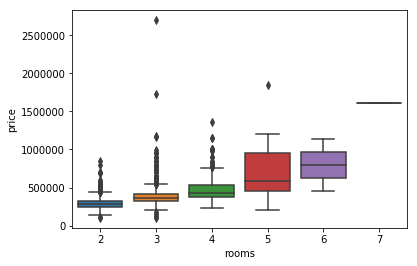

In [43]:
sns.boxplot(x="rooms", y = "price", data = r) # im więcej pokoi tym cena większa

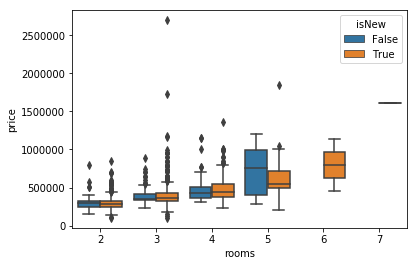

In [44]:
sns.boxplot(x="rooms", y = "price", hue = "isNew", data = r) 
# im więcej pokoi tym cena większa

In [45]:
r[r.rooms == 6 ]

,price,isNew,rooms,floor,location,sqrMeters
470,1140000.0,True,6,0,Stare,40
490,450000.0,True,6,4,Wilda,90


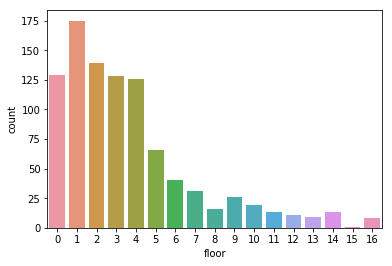

In [46]:
sns.countplot(x = "floor", data = r_popular_locations) 
# ten barplot jest bardziej kolorowy niż ten z pandasa :)

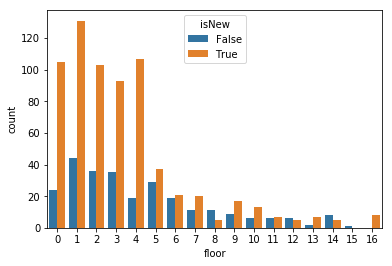

In [47]:
sns.countplot(x = "floor", hue = "isNew", data = r_popular_locations)

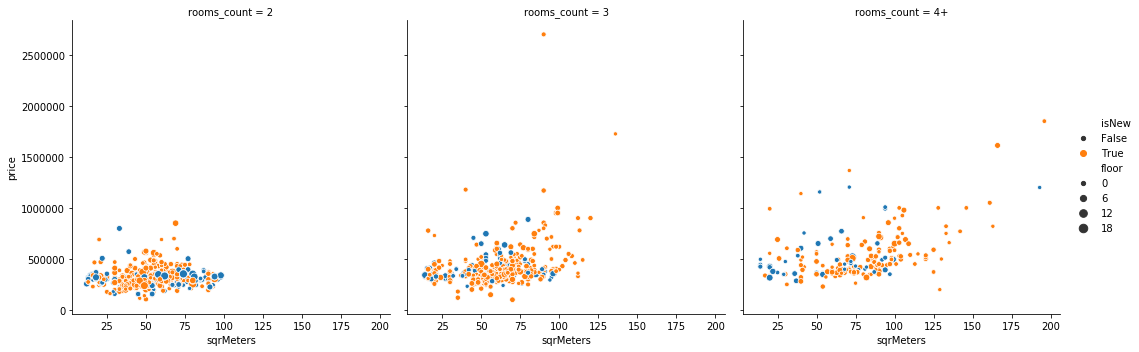

In [48]:
# Finally - RelPlot - a fancy way of visualizing multiple (here 5) features on one figure.

r['rooms_count'] = np.where(r['rooms'] > 3, '4+', r['rooms'])
sns.relplot(x="sqrMeters", y="price", hue="isNew",
                 col="rooms_count", col_wrap=3, 
            size="floor",
            data=r.sort_values('rooms_count'))

# Pobawmy się jeszcze samymi danymi dzięki pandasowi

In [49]:
r_price_sqrMeters = pd.DataFrame(r, columns=['price','sqrMeters']) # zrób data frame z 2 kolumn
r_price_sqrMeters.head()

,price,sqrMeters
0,476118.0,78
1,459531.0,62
2,411557.0,15
3,496416.0,14
4,406032.0,15


**Ćwiczenie**

Pokaż najtańsze mieszkanie.

In [50]:
r[r.price == r.price.min()]

,price,isNew,rooms,floor,location,sqrMeters,rooms_count
339,100000.0,True,3,4,Stare,70,3


**Ćwiczenie**

pokaż tylko mieszkania używane powyżej 1kk

In [51]:
r[( r.price > 1000000 ) & (r.isNew == True)]

,price,isNew,rooms,floor,location,sqrMeters,rooms_count
323,1725000.0,True,3,0,Stare,136,3
470,1140000.0,True,6,0,Stare,40,4+
533,1850000.0,True,5,1,Grunwald,196,4+
826,1050000.0,True,5,2,Centrum,161,4+
904,1612000.0,True,7,5,Jeżyce,166,4+
1172,1179000.0,True,3,2,Centrum,40,3
1173,2700000.0,True,3,2,Centrum,90,3
1174,1170000.0,True,3,3,Centrum,90,3
1258,1366410.0,True,4,0,Centrum,71,4+


In [52]:
r['price_in_thousands'] = (r['price'] / 1000).astype(int) # dodaj nową kolumnę
r['price_in_thousands'].head()

0    476
1    459
2    411
3    496
4    406
Name: price_in_thousands, dtype: int64

In [53]:
r['price_in_thousands2'] = r.price.apply(lambda x: int(x / 1000) ) # można tez tak
r['price_in_thousands2'].head()

0    476
1    459
2    411
3    496
4    406
Name: price_in_thousands2, dtype: int64

In [54]:
r['price_in_thousands3'] = r.price.map(lambda x: int(x / 1000) ) # albo tak
r['price_in_thousands3'].head()

0    476
1    459
2    411
3    496
4    406
Name: price_in_thousands3, dtype: int64

In [55]:
r_max_price = r.copy()
r_max_price.price = r_max_price.price.map(lambda x: 1000000 if x > 1000000 else x) 
# dla cen mieszkań powyżej 1kk zmień cenę na 1kk
r_max_price.price.max()

1000000.0

In [59]:
r = pd.read_csv('ceny_mieszkan_w_poznaniu.tsv', sep = '\t')

In [60]:
pandas_profiling.ProfileReport(r)

Number of variables,6
Number of observations,1674
Total Missing (%),0.0%
Total size in memory,67.1 KiB
Average record size in memory,41.0 B
Numeric,4
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0
